# Cats and Dogs Classification

Data Loading and Exploring

In [1]:
import os
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# cat training pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# dog training pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# cat validation pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# dog validation pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
# view file names
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


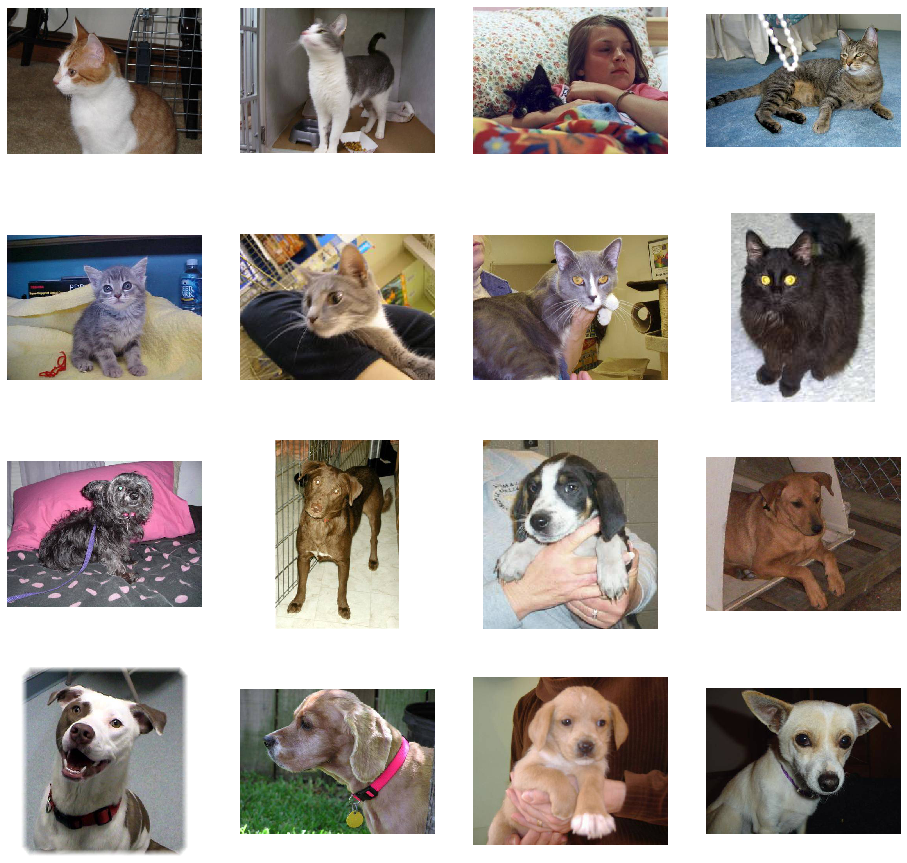

In [3]:
# preview images to know what the dataset is like
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4*4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4*4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# 8 images for cats and dogs separately
pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices starts at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()    

build a small convnet from scratch to get to 72% accuracy

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 150*150*3: 150*150 for the image pixels, 
# and 3 for the three color channels: R, G and B
img_input = layers.Input(shape=(150,150,3))

# First convolution extracts 16 filters that are 3*3
# Convolution is followed by max-pooling layer with a 2*2 window
x = layers.Conv2D(16,3,activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3*3
# Convolution is followed by max-pooling layer with a 2*2 window
x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3*3
# Convolution is followed by max-pooling layer with a 2*2 window
x = layers.Conv2D(64,3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

fully-connected layers: because we are facing a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1.

In [5]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)
# Generate a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512,activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create Model
# input = input feature map
# output = output feature map
# connected layer + sigmoid output layer 
model = Model(img_input,output)

Let's summarize the model architecture

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [7]:
# use RMSprop instead of stochastic gradient 
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

Data Preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the source directory for training images
    target_size=(150,150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training
<br>train on 2000 images, for 15 epochs and validate on 1000 images

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size * steps
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50, # 1000 images = batch_size * steps
    verbose=1
)

Epoch 1/15
